In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from __future__ import division
import pandas as pd

## 1.  Forward Pass

#### Helper Functions

In [2]:
def loss(y, y_hat):
    # cross entropy
    tot = y * np.log(y_hat)
    return  -tot.sum()

def sigmoid(x):
    return 1/(1+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

def relu(x):
    return np.maximum(x,0)

def relu_derivative(x):
    return np.where(x>0, 1, 0)

def softmax(z):
    return np.exp(z)/(np.sum(np.exp(z),axis=1))[:,np.newaxis]


#### Forward Pass

In [3]:
def forward(x, params):
    W1,b1,W2,b2,W3,b3 = params
    h1 = relu(np.dot(x, W1) + b1)
    h2 = relu(np.dot(h1, W2) + b2)
    y = softmax(np.dot(h2,W3) + b3)
    return y

In [4]:
w1 = np.array([[1, -1, 0],[0,0,.5]]).reshape(2,3)
w2 = np.array([[1, 0, 0],[-1,-1,0]]).reshape(3,2)
w3 = np.array([[1, 0, -1],[1,0,-1]]).reshape(2,3)
b1 = np.array([0,0,1]).reshape(1,3)
b2 = np.array([1,-1]).reshape(1,2)
b3 = np.array([1,0,0]).reshape(1,3)


x = np.array([[1,-1],[0,-1],[0,1]]).reshape((3,2))

In [5]:
forward(x, (w1,b1,w2,b2,w3,b3) )

array([[ 0.90875992,  0.07459556,  0.01664452],
       [ 0.73612472,  0.16425163,  0.09962365],
       [ 0.57611688,  0.21194156,  0.21194156]])

## 2. Rosenbrock Function

#### Visualization

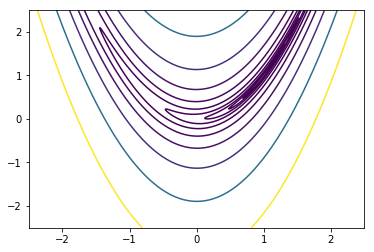

In [6]:
delta = 0.01
s = 2.5
x = np.arange(-s, s, delta)
y = np.arange(-s, s, delta)
X, Y = np.meshgrid(x, y)
Z = (1-X)**2 + 100*(Y - X**2)**2
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=10))

#### Partial Derivatives

In [35]:
def grad_f(vector):
    x, y = vector
    df_dx = 2*(200*x**3 - 200*x*y + x - 1)
    df_dy = 200*(y - x**2)
    return np.array([df_dx, df_dy])

#### Gradient Descent

In [36]:
def grad_descent(starting_point=None, iterations=10, learning_rate=12):
    if starting_point:
        point = starting_point
    else:
        point = np.random.uniform(-3,3,size=2)
    trajectory = [point]
    
    for i in range(iterations):
        grad = grad_f(point)
        point = point - (learning_rate * grad)
        trajectory.append(point)
    return np.array(trajectory)

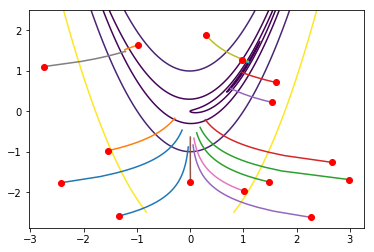

In [62]:
fig, ax = plt.subplots()
CS = ax.contour(X, Y, Z, levels=np.logspace(start=-1,stop=3, num=5))

trajectories = []
for i in range(15):
    traj = grad_descent(iterations=50, learning_rate=1e-4)
    trajectories.append(grad_descent(iterations=50, learning_rate=1e-4))
    
    x= traj[:,0]
    y= traj[:,1]
    plt.plot(x,y,'-')
    plt.plot(x[0],y[0],'ro')

## 3. Backprop

#### Gradients

In [75]:
def grad_f(params, x, y):
    
    W1, b1, W2, b2, W3, b3 = params

    a1 = x.dot(W1) + b1
    H1 = relu(a1)
    a2 = H1.dot(W2) + b2
    H2 = relu(a2)
    a3 = H2.dot(W3) + b3
    y_hat = softmax(a3)
    
    d_b3 = (y_hat - y).sum(axis=0)
    d_W3 = H2.T.dot(y_hat-y)
    
    d_b2 = ((y_hat - y).dot(W3.T)*relu_derivative(a2)).sum(axis=0)
    d_W2 = H1.T.dot((y_hat - y).dot(W3.T)*relu_derivative(a2))
    
    d_b1 = ((y_hat - y).dot(W3.T)*relu_derivative(a2)).dot(W2.T)* relu_derivative(a1).sum(axis=0)
    d_W1 = x.T.dot(((y_hat - y).dot(W3.T)*relu_derivative(a2)).dot(W2.T)* relu_derivative(a1)) 
    
    return (d_W1, d_b1, d_W2, d_b2, d_W3, d_b3)


def grad_descent(x, y, starting_point, iterations=10, learning_rate=1e-2):
    point = starting_point 
    trajectory = [point]
    losses = [loss(y, forward(x, point))]
    
    for i in range(iterations):
        grads = grad_f(point, x, y)
        
        update = []
        for (matrix, grad) in zip(point, grads):
            update.append(matrix - learning_rate*grad)
        point = tuple(update)
        
        trajectory.append(point)
        losses.append(loss(y, forward(x, point)))
    return (np.array(trajectory), losses)

def initialize_params():
    w1 = np.random.randn(6).reshape(2,3)
    w2 = np.random.randn(6).reshape(3,2)
    w3 = np.random.randn(6).reshape(2,3)
    b1 = np.random.randn(3).reshape(1,3)
    b2 = np.random.randn(2).reshape(1,2)
    b3 = np.random.randn(3).reshape(1,3)
    return (w1, b1, w2, b2, w3, b3)

#### Gaussian mixture data

In [66]:
def gen_gmm_data(n = 999, plot=False):
    # Fixing seed for repeatability
    np.random.seed(123)
    
    # Parameters of a normal distribuion
    mean_1 = [0, 2] ; mean_2 = [2, -2] ; mean_3 = [-2, -2]
    mean = [mean_1, mean_2, mean_3] ; cov = [[1, 0], [0, 1]]  
    
    # Setting up the class probabilities
    n_samples = n
    pr_class_1 = pr_class_2 = pr_class_3 = 1/3.0
    n_class = (n_samples * np.array([pr_class_1,pr_class_2, pr_class_3])).astype(int)
  
    # Generate sample data
    for i in range(3):
        x1,x2 = np.random.multivariate_normal(mean[i], cov, n_class[i]).T
        if (i==0):
            xs = np.array([x1,x2])
            cl = np.array([n_class[i]*[i]])
        else: 
            xs_new = np.array([x1,x2])
            cl_new = np.array([n_class[i]*[i]])
            xs = np.concatenate((xs, xs_new), axis = 1)
            cl = np.concatenate((cl, cl_new), axis = 1)
            
        # One hot encoding classes
    y = pd.Series(cl[0].tolist())
    y = pd.get_dummies(y).as_matrix() 

    # Normalizing data (prevents overflow errors)     
    mu = xs.mean(axis = 1)
    std = xs.std(axis = 1)
    xs = (xs.T - mu) / std
    
    return xs, y, cl

In [67]:
x,y,cl = gen_gmm_data(100)

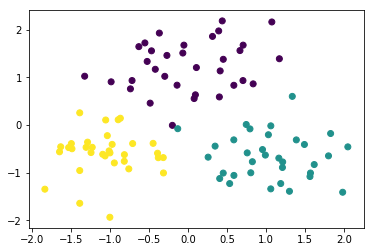

In [68]:
plt.scatter(x[:,0], x[:,1], c=cl)

#### Fitting the model

In [71]:
p_0 = initialize_params()
traj, losses = grad_descent(x, y, starting_point=p_0, iterations=50,learning_rate=1e-3)

1.0

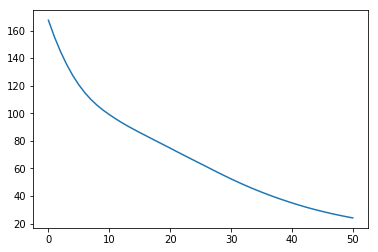

In [72]:
plt.plot(losses)

pred_probs = forward(x, traj[-1])
# accuracy
sum((np.argmax(pred_probs, axis=1) == cl)[0,:]) / cl.shape[1]